In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime
import time

from sys import path
path.append(r'E:\data_mining\project\IJCAI-17-口碑\koubei')

import predict
import base
import shop_classify as sc

%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn import metrics

In [3]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [4]:
today = datetime.date.today()

In [79]:
#读取训练集
X_train_df = pd.read_csv('../data/train/mean_arima/X_train' + today.isoformat() + '.csv', index_col=0)
y_train_df = pd.read_csv('../data/train/mean_arima/y_train' + today.isoformat() + '.csv', index_col=0)

In [80]:
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X_train_df, y_train_df['type'], random_state=0, test_size=0.5)

In [7]:
tuned_parameters = {'learning_rate':[0.03, 0.05, 0.07], 'n_estimators': [40, 50, 60],
                     'min_samples_split': [7, 10, 13], 'min_samples_leaf': [4, 6], 'max_depth': [3]}


rf = GradientBoostingClassifier(random_state=0)

clf = GridSearchCV(rf, tuned_parameters, cv=4, scoring='recall')
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Best parameters set found on development set:

{'min_samples_leaf': 6, 'n_estimators': 60, 'max_depth': 3, 'learning_rate': 0.07, 'min_samples_split': 7}

Grid scores on development set:

0.315 (+/-0.119) for {'min_samples_leaf': 4, 'n_estimators': 40, 'max_depth': 3, 'learning_rate': 0.03, 'min_samples_split': 7}
0.330 (+/-0.102) for {'min_samples_leaf': 4, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.03, 'min_samples_split': 7}
0.356 (+/-0.144) for {'min_samples_leaf': 4, 'n_estimators': 60, 'max_depth': 3, 'learning_rate': 0.03, 'min_samples_split': 7}
0.315 (+/-0.119) for {'min_samples_leaf': 4, 'n_estimators': 40, 'max_depth': 3, 'learning_rate': 0.03, 'min_samples_split': 10}
0.330 (+/-0.102) for {'min_samples_leaf': 4, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.03, 'min_samples_split': 10}
0.356 (+/-0.144) for {'min_samples_leaf': 4, 'n_estimators': 60, 'max_depth': 3, 'learning_rate': 0.03, 'min_samples_split': 10}
0.315 (+/-0.119) for {'min_samples_leaf':

In [8]:
#######rRF

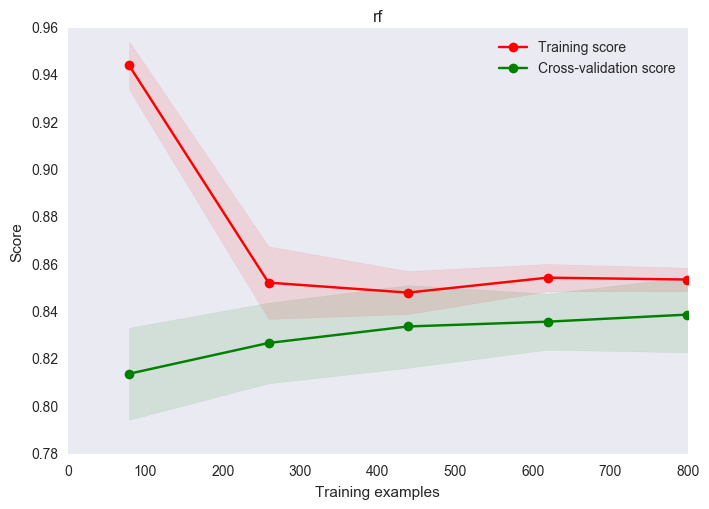

In [81]:
rf_classifier = RandomForestClassifier(
    n_estimators=50, max_depth=3, min_samples_split=7, min_samples_leaf=4, n_jobs=2, random_state=0, class_weight=None)
plot_learning_curve(rf_classifier, 'rf', X_train, y_train, cv=5)
plt.show()

In [82]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=4,
            min_samples_split=7, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=2, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [83]:
rf_classifier.score(X_test, y_test)

0.83599999999999997

In [84]:
y_pred = rf_classifier.predict(X_test)

In [85]:
metrics.precision_score(y_test, y_pred, pos_label=1)

0.68085106382978722

In [86]:
metrics.recall_score(y_test, y_pred, pos_label=1)

0.17679558011049723

In [87]:
y_pred_df = pd.DataFrame(y_pred, index = y_test.index)

In [95]:
y_pred_df.to_csv('../data/train/mean_arima/y_predict_rf.csv')

In [96]:
y_pred_df[y_pred_df[0] == 1].count()

0    47
dtype: int64

In [ ]:
#######GBDT

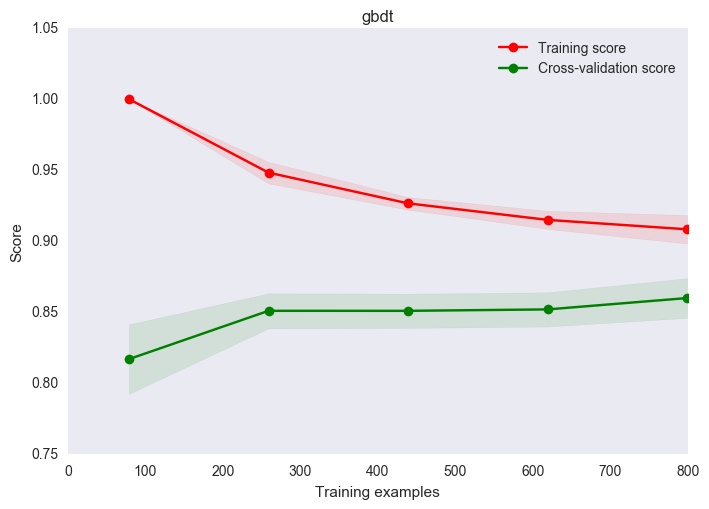

In [52]:
#random_state=0, min_samples_split=20, max_depth=3, learning_rate=0.05, min_samples_leaf=3, n_estimators=50 0.081562
learning_gbdt = GradientBoostingClassifier(random_state=0, min_samples_split=20, max_depth=3, learning_rate=0.05, min_samples_leaf=3, n_estimators=50)
plot_learning_curve(learning_gbdt, 'gbdt', X_train, y_train, cv=5)
plt.show()

In [53]:
learning_gbdt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=3,
              min_samples_split=20, min_weight_fraction_leaf=0.0,
              n_estimators=50, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [54]:
learning_gbdt.score(X_test, y_test)

0.84899999999999998

In [55]:
y_pred = learning_gbdt.predict(X_test)

In [56]:
metrics.precision_score(y_test, y_pred, pos_label=0)

0.86069114470842334

In [57]:
metrics.recall_score(y_test, y_pred, pos_label=0)

0.97313797313797312

In [58]:
y_pred_df = pd.DataFrame(y_pred, index=y_test.index)

In [59]:
y_pred_df.to_csv('../data/train/mean_arima/y_predict_gbdt.csv')